In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:


import sys
import os
py_file_location = "/content/drive/MyDrive/AI/WORK2/include"
sys.path.append(os.path.abspath(py_file_location))
import helpers
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import tensorflow.compat.v1 as tf
tf.get_logger().propagate = False

from datetime import datetime
from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

Knock


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


i:3, y_predicted:2, y: 0, y_prob: 0.9507684111595154
i:4, y_predicted:2, y: 0, y_prob: 0.7674583792686462
i:5, y_predicted:2, y: 0, y_prob: 0.6521438956260681
i:6, y_predicted:2, y: 0, y_prob: 0.9821855425834656
i:32, y_predicted:3, y: 0, y_prob: 0.9817537665367126
i:67, y_predicted:2, y: 0, y_prob: 0.9651094675064087
i:94, y_predicted:3, y: 1, y_prob: 0.9612578749656677
i:127, y_predicted:3, y: 1, y_prob: 0.6976061463356018
i:138, y_predicted:3, y: 1, y_prob: 0.6314142942428589
i:142, y_predicted:3, y: 1, y_prob: 0.7976700663566589
i:143, y_predicted:3, y: 1, y_prob: 0.5934791564941406
i:146, y_predicted:3, y: 1, y_prob: 0.8914247155189514
i:150, y_predicted:3, y: 1, y_prob: 0.9463510513305664
i:212, y_predicted:2, y: 1, y_prob: 0.930124819278717
i:749, y_predicted:2, y: 3, y_prob: 0.7587928175926208
i:821, y_predicted:1, y: 3, y_prob: 0.990865170955658
i:1474, y_predicted:1, y: 3, y_prob: 0.9999979734420776
i:1565, y_predicted:1, y: 3, y_prob: 0.9994558691978455
i:1578, y_predicted:1

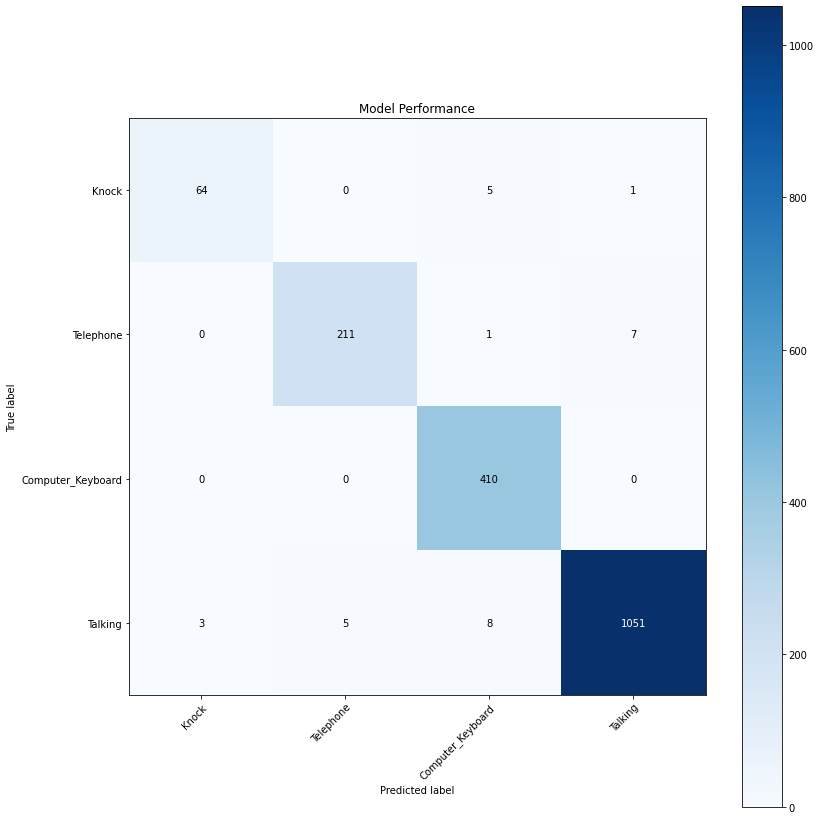

In [4]:
tf.compat.v1.disable_v2_behavior()

# Set your path to the dataset
# models_path = os.path.abspath('./models')
# data_path = os.path.abspath('./data')

labels = [
    'Knock',
    'Telephone',
    'Computer_Keyboard',
    'Talking'
    ] 

print(labels[0])
model_file = 'my_model_mel.h5'
model_path = os.path.join('/content/drive/MyDrive/AI/WORK2/models', model_file)
X_test = np.load("/content/drive/MyDrive/AI/WORK2/data/X-mel-test.npy")
y_test = np.load("/content/drive/MyDrive/AI/WORK2/data/y-mel-test.npy")


X_test = X_test.reshape(X_test.shape[0], 30, 32, 1)
le = LabelEncoder()
y_test_encoded = to_categorical(le.fit_transform(y_test))

# Load best saved model
model = load_model(model_path)

# Predict probabilities for test set
y_probs = model.predict(X_test, verbose=0)

# Get predicted labels
yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test_encoded, axis=1)

# Add "pred" column
#test_meta['pred'] = yhat_probs

# Sets decimal precision (for printing output only)
np.set_printoptions(precision=2)

# Compute confusion matrix data
cm = confusion_matrix(y_trues, yhat_probs)

count = 0
for i in range(len(y_trues)):
    if (y_trues[i] != yhat_probs[i]):
        print(f"i:{i}, y_predicted:{yhat_probs[i]}, y: {y_trues[i]}, y_prob: {y_probs[i][yhat_probs[i]]}")
        count+=1
print("count = ", count)
print("y = ", y_trues[604])
helpers.plot_confusion_matrix(cm,
                          labels,
                          normalized=False,
                          title="Model Performance",
                          cmap=plt.cm.Blues,
                          size=(12,12))